# **Pendigits Dataset**
The Pendigits Dataset is designed for handwritten digit recognition tasks, offering a robust and diverse collection of pen-based digit samples. This dataset is widely used for machine learning projects, especially in classification tasks, as it provides a solid foundation for building and evaluating handwriting recognition systems

---

### **Dataset Details**
* Total Samples: 10,992
* Features: 16 features representing pen-tip (x, y) coordinates during digit writing.
* Classes: 10 target classes (digits 0-9).
* Format: Each row represents a single handwritten digit, with 16 feature values and a target class.



# **Visualize The Data**
We want to first understand what the data is and so we will be using matplot lib to graph the coordinates and visualize the data values

   input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0      47     100      27      81      57      37      26       0       0   
1       0      89      27     100      42      75      29      45      15   
2       0      57      31      68      72      90     100     100      76   
3       0     100       7      92       5      68      19      45      86   
4       0      67      49      83     100     100      81      80      60   

   input10  input11  input12  input13  input14  input15  input16  class  
0       23       56       53      100       90       40       98      8  
1       15       37        0       69        2      100        6      2  
2       75       50       51       28       25       16        0      1  
3       34      100       45       74       23       67        0      4  
4       60       40       40       33       20       47        0      1  
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ..

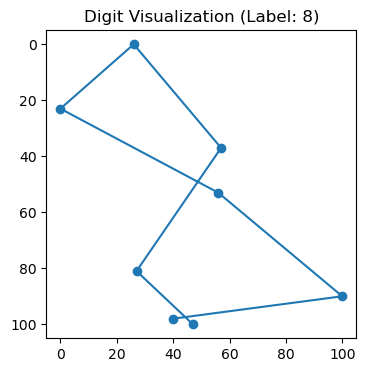

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Make Sure it is in the Right Place
# Copy Path and Paste it here
df = pd.read_csv("/Users/andrewxue/Documents/PenDigitsNN/pendigits_txt.csv")

# Display the first few rows
print(df.head())

# Extract first data point (assuming features are in first 16 columns)
first_point = df.iloc[0, :-1].values  # Exclude the last column (label)

# X Y coordinates are as follows [X, Y, X, Y ...]
# We can slice the array into X's and Y's using step by 2
x = first_point[::2]  # X-coordinates
y = first_point[1::2]  # Y-coordinates

# Plot the digit
plt.figure(figsize=(4, 4))
plt.plot(x, y, marker='o', linestyle='-')
plt.gca().invert_yaxis()  # Invert Y-axis to match drawing convention
plt.title(f"Digit Visualization (Label: {df.iloc[0, -1]})")
plt.show()

# Data Analysis

We will try to find some patterns in the data, maybe stuff like most numbers one start with a point in the upper half so y>50 and end with a point in the lower half y<50

Alot of 9's might start in top right quadrant

Alot of 2's might be top left

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


None

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
count,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000
mean,38.814320,85.120269,40.605622,83.774199,49.770378,65.573144,51.220251,44.498999,56.868541,33.695961,60.516376,34.826510,55.022289,34.937045,47.287482,28.845342,4.431587
std,34.257783,16.218571,26.342984,19.163646,34.100515,26.996688,30.576881,29.906104,34.135530,27.251548,37.288086,27.119982,22.335539,33.155463,41.760400,35.778094,2.876947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,76.000000,20.000000,72.000000,18.000000,49.000000,28.000000,23.000000,29.000000,7.000000,23.000000,11.000000,42.000000,5.000000,0.000000,0.000000,2.000000
50%,32.000000,89.000000,40.000000,91.000000,53.000000,71.000000,53.500000,43.000000,60.000000,33.000000,73.000000,30.000000,53.000000,27.000000,40.000000,9.000000,4.000000
75%,65.000000,100.000000,58.000000,100.000000,78.000000,86.000000,74.000000,64.000000,89.000000,54.000000,97.000000,55.000000,68.000000,47.000000,100.000000,51.000000,7.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,9.000000


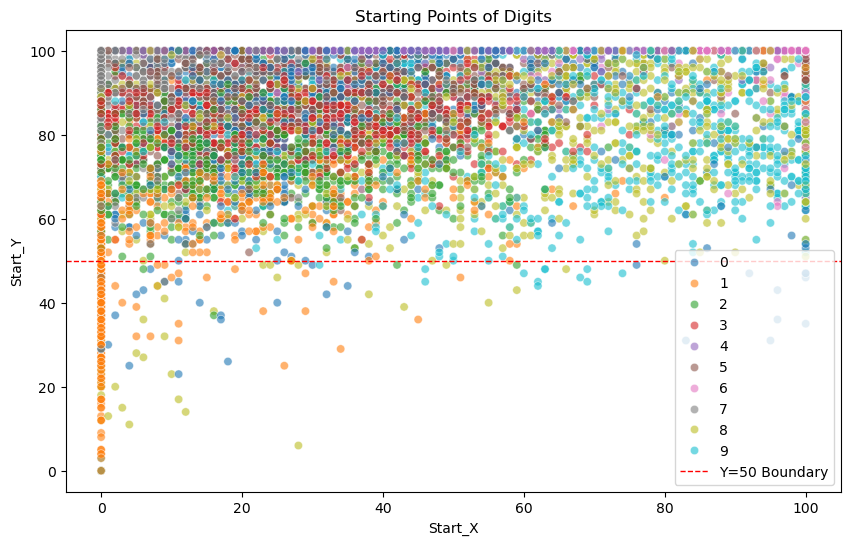

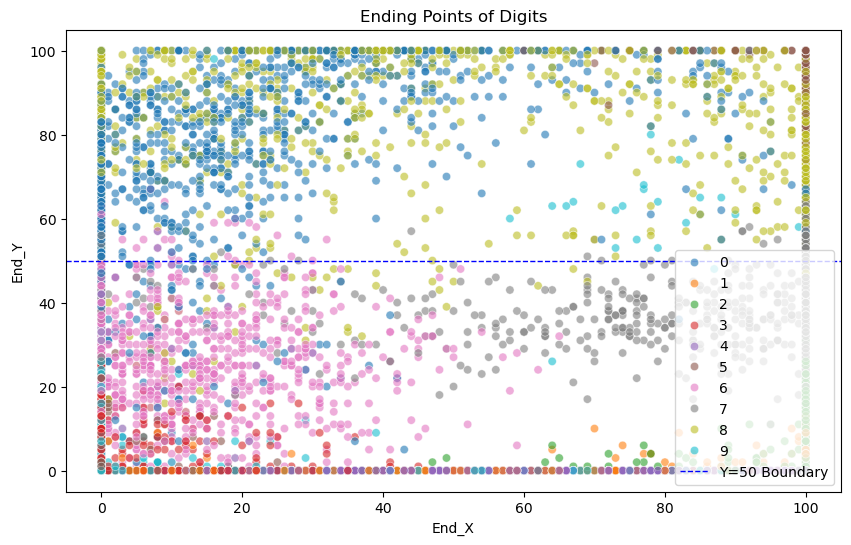

Digit  Start_Quadrant
2      Bottom Left          3
       Bottom Right         8
       Top Left          1069
       Top Right           64
9      Bottom Left         27
       Bottom Right        18
       Top Left           223
       Top Right          787
dtype: int64

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "pendigits_txt.csv"
df = pd.read_csv(url)

# Display basic info
display(df.head())
display(df.info())
display(df.describe())

# Extract features and labels
X = df.iloc[:, :-1]  # First 16 columns are coordinate pairs
Y = df.iloc[:, -1]   # Last column is the digit label

# Extract starting and ending points
start_x, start_y = X.iloc[:, 0], X.iloc[:, 1]
end_x, end_y = X.iloc[:, -2], X.iloc[:, -1]

# Create a dataframe for analysis
start_end_df = pd.DataFrame({
    'Digit': Y,
    'Start_X': start_x,
    'Start_Y': start_y,
    'End_X': end_x,
    'End_Y': end_y
})

# Plot starting points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=start_end_df, x='Start_X', y='Start_Y', hue='Digit', palette='tab10', alpha=0.6)
plt.axhline(50, color='red', linestyle='--', linewidth=1, label='Y=50 Boundary')
plt.title('Starting Points of Digits')
plt.legend()
plt.show()

# Plot ending points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=start_end_df, x='End_X', y='End_Y', hue='Digit', palette='tab10', alpha=0.6)
plt.axhline(50, color='blue', linestyle='--', linewidth=1, label='Y=50 Boundary')
plt.title('Ending Points of Digits')
plt.legend(loc='lower right')
plt.show()

# Analyze Quadrants for digits 9 and 2
def get_quadrant(x, y):
    if x > 50 and y > 50:
        return 'Top Right'
    elif x < 50 and y > 50:
        return 'Top Left'
    elif x < 50 and y < 50:
        return 'Bottom Left'
    else:
        return 'Bottom Right'

start_end_df['Start_Quadrant'] = start_end_df.apply(lambda row: get_quadrant(row['Start_X'], row['Start_Y']), axis=1)

# Filter for 9s and 2s
digits_to_check = start_end_df[start_end_df['Digit'].isin([9, 2])]
display(digits_to_check.groupby(['Digit', 'Start_Quadrant']).size())


/var/folders/4k/79b23rw97738062131pjh8dr0000gn/T/ipykernel_96562/3110714886.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=distance_df, x='Digit', y='Total_Distance', palette='tab10')


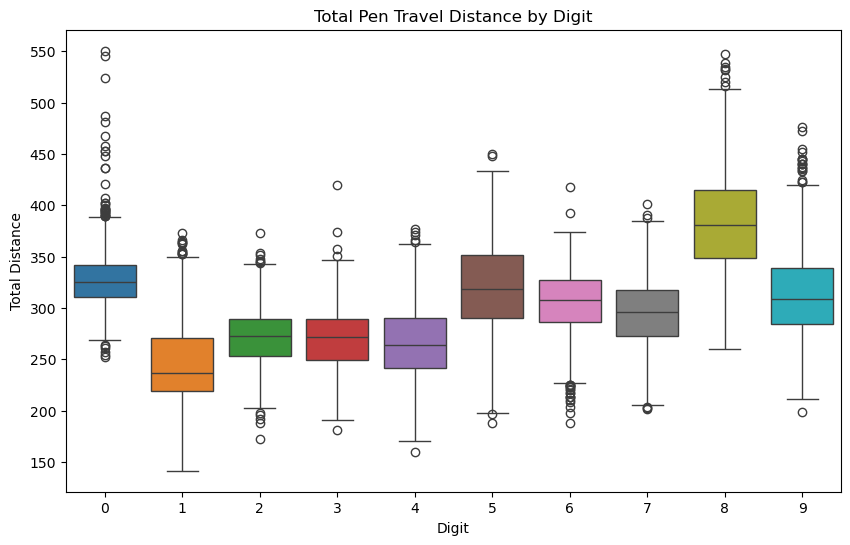

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
url = "pendigits_txt.csv"
df = pd.read_csv(url)

# Extract features and labels
X = df.iloc[:, :-1]  # First 16 columns are coordinate pairs
Y = df.iloc[:, -1]   # Last column is the digit label

# Extract starting and ending points
start_x, start_y = X.iloc[:, 0], X.iloc[:, 1]
end_x, end_y = X.iloc[:, -2], X.iloc[:, -1]

# Compute total pen travel distance
def compute_distance(row):
    coords = row.values.reshape(-1, 2)
    return np.sum(np.sqrt(np.diff(coords[:, 0])**2 + np.diff(coords[:, 1])**2))

total_distances = X.apply(compute_distance, axis=1)

distance_df = pd.DataFrame({
    'Digit': Y,
    'Total_Distance': total_distances
})

distance_df = distance_df.reset_index(drop=True)  # Ensure indexing consistency

# Plot total pen travel distance
plt.figure(figsize=(10, 6))
sns.boxplot(data=distance_df, x='Digit', y='Total_Distance', palette='tab10')
plt.title('Total Pen Travel Distance by Digit')
plt.ylabel('Total Distance')
plt.show()





,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


None

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
count,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000
mean,38.814320,85.120269,40.605622,83.774199,49.770378,65.573144,51.220251,44.498999,56.868541,33.695961,60.516376,34.826510,55.022289,34.937045,47.287482,28.845342,4.431587
std,34.257783,16.218571,26.342984,19.163646,34.100515,26.996688,30.576881,29.906104,34.135530,27.251548,37.288086,27.119982,22.335539,33.155463,41.760400,35.778094,2.876947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,76.000000,20.000000,72.000000,18.000000,49.000000,28.000000,23.000000,29.000000,7.000000,23.000000,11.000000,42.000000,5.000000,0.000000,0.000000,2.000000
50%,32.000000,89.000000,40.000000,91.000000,53.000000,71.000000,53.500000,43.000000,60.000000,33.000000,73.000000,30.000000,53.000000,27.000000,40.000000,9.000000,4.000000
75%,65.000000,100.000000,58.000000,100.000000,78.000000,86.000000,74.000000,64.000000,89.000000,54.000000,97.000000,55.000000,68.000000,47.000000,100.000000,51.000000,7.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,9.000000


/var/folders/4k/79b23rw97738062131pjh8dr0000gn/T/ipykernel_96562/1781017257.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=start_end_df, x='Digit', y='Start_X', ax=axes[0, 0], jitter=True, alpha=0.6, palette='tab10')
/var/folders/4k/79b23rw97738062131pjh8dr0000gn/T/ipykernel_96562/1781017257.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=start_end_df, x='Digit', y='Start_Y', ax=axes[0, 1], jitter=True, alpha=0.6, palette='tab10')
/var/folders/4k/79b23rw97738062131pjh8dr0000gn/T/ipykernel_96562/1781017257.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=F

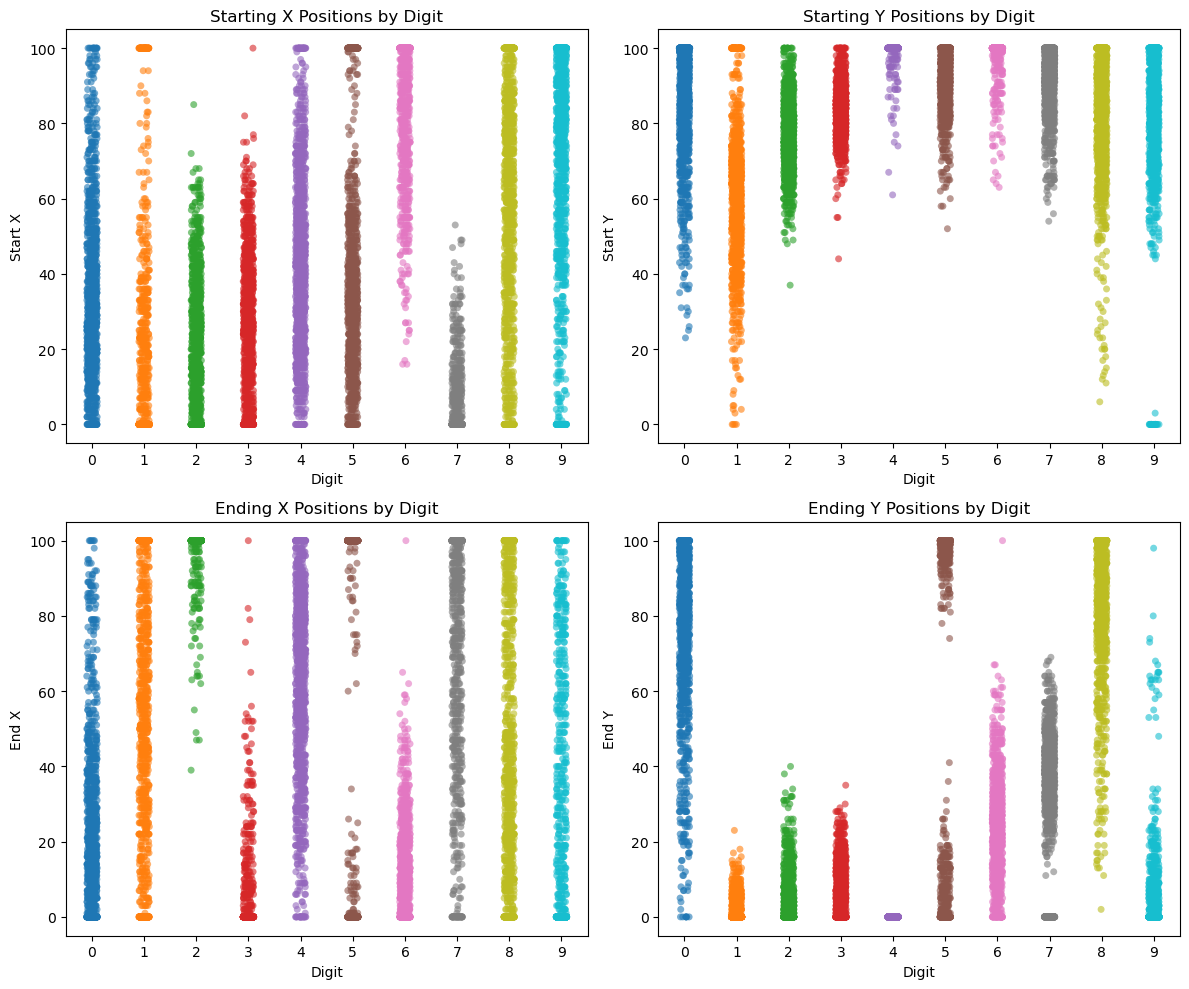

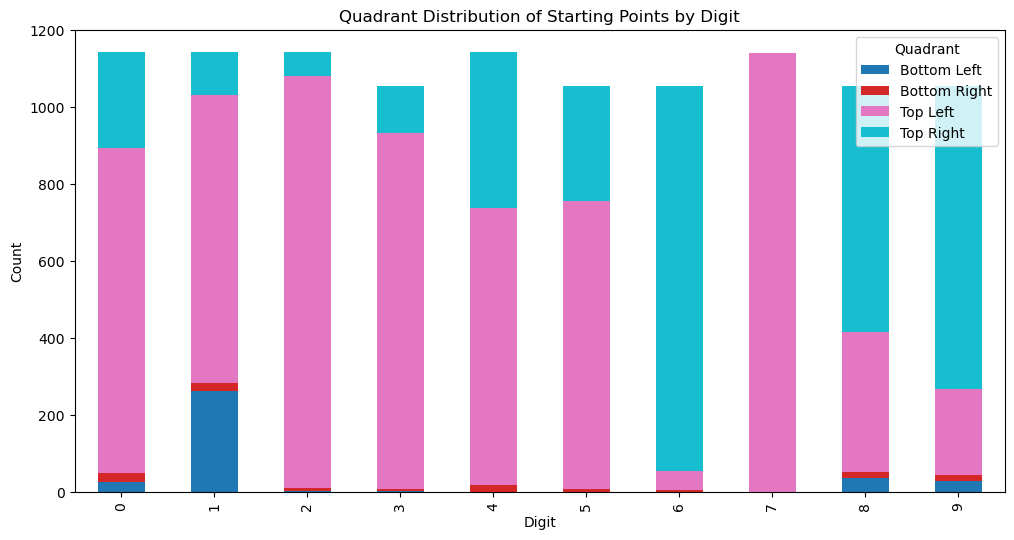

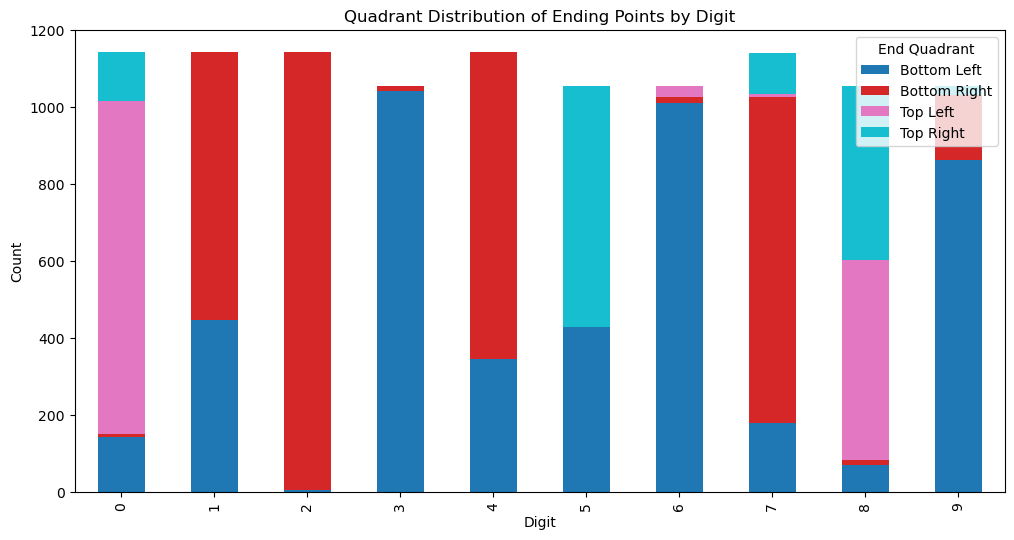

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "pendigits_txt.csv"
df = pd.read_csv(url)

# Display basic info
display(df.head())
display(df.info())
display(df.describe())

# Extract features and labels
X = df.iloc[:, :-1]  # First 16 columns are coordinate pairs
Y = df.iloc[:, -1]   # Last column is the digit label

# Extract starting and ending points
start_x, start_y = X.iloc[:, 0], X.iloc[:, 1]
end_x, end_y = X.iloc[:, -2], X.iloc[:, -1]

# Create a dataframe for analysis
start_end_df = pd.DataFrame({
    'Digit': Y,
    'Start_X': start_x,
    'Start_Y': start_y,
    'End_X': end_x,
    'End_Y': end_y
})

# Plot dot plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Dot plot for Starting X
sns.stripplot(data=start_end_df, x='Digit', y='Start_X', ax=axes[0, 0], jitter=True, alpha=0.6, palette='tab10')
axes[0, 0].set_title('Starting X Positions by Digit')
axes[0, 0].set_ylabel('Start X')

# Dot plot for Starting Y
sns.stripplot(data=start_end_df, x='Digit', y='Start_Y', ax=axes[0, 1], jitter=True, alpha=0.6, palette='tab10')
axes[0, 1].set_title('Starting Y Positions by Digit')
axes[0, 1].set_ylabel('Start Y')

# Dot plot for Ending X
sns.stripplot(data=start_end_df, x='Digit', y='End_X', ax=axes[1, 0], jitter=True, alpha=0.6, palette='tab10')
axes[1, 0].set_title('Ending X Positions by Digit')
axes[1, 0].set_ylabel('End X')

# Dot plot for Ending Y
sns.stripplot(data=start_end_df, x='Digit', y='End_Y', ax=axes[1, 1], jitter=True, alpha=0.6, palette='tab10')
axes[1, 1].set_title('Ending Y Positions by Digit')
axes[1, 1].set_ylabel('End Y')

plt.tight_layout()
plt.show()

# Analyze Quadrants for digits 9 and 2
def get_quadrant(x, y):
    if x > 50 and y > 50:
        return 'Top Right'
    elif x < 50 and y > 50:
        return 'Top Left'
    elif x < 50 and y < 50:
        return 'Bottom Left'
    else:
        return 'Bottom Right'

start_end_df['Start_Quadrant'] = start_end_df.apply(lambda row: get_quadrant(row['Start_X'], row['Start_Y']), axis=1)
start_end_df['End_Quadrant'] = start_end_df.apply(lambda row: get_quadrant(row['End_X'], row['End_Y']), axis=1)

# Count occurrences of each quadrant per digit
quadrant_counts = start_end_df.groupby(['Digit', 'Start_Quadrant']).size().unstack().fillna(0)

# Plot quadrant distribution
quadrant_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Quadrant Distribution of Starting Points by Digit')
plt.ylabel('Count')
plt.xlabel('Digit')
plt.legend(title='Quadrant')
plt.show()

# Count occurrences of each quadrant per digit for ending points
quadrant_counts_end = start_end_df.groupby(['Digit', 'End_Quadrant']).size().unstack().fillna(0)

# Plot quadrant distribution for ending points
quadrant_counts_end.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Quadrant Distribution of Ending Points by Digit')
plt.ylabel('Count')
plt.xlabel('Digit')
plt.legend(title='End Quadrant', loc='upper right')
plt.show()


,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


None

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
count,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000
mean,38.814320,85.120269,40.605622,83.774199,49.770378,65.573144,51.220251,44.498999,56.868541,33.695961,60.516376,34.826510,55.022289,34.937045,47.287482,28.845342,4.431587
std,34.257783,16.218571,26.342984,19.163646,34.100515,26.996688,30.576881,29.906104,34.135530,27.251548,37.288086,27.119982,22.335539,33.155463,41.760400,35.778094,2.876947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,76.000000,20.000000,72.000000,18.000000,49.000000,28.000000,23.000000,29.000000,7.000000,23.000000,11.000000,42.000000,5.000000,0.000000,0.000000,2.000000
50%,32.000000,89.000000,40.000000,91.000000,53.000000,71.000000,53.500000,43.000000,60.000000,33.000000,73.000000,30.000000,53.000000,27.000000,40.000000,9.000000,4.000000
75%,65.000000,100.000000,58.000000,100.000000,78.000000,86.000000,74.000000,64.000000,89.000000,54.000000,97.000000,55.000000,68.000000,47.000000,100.000000,51.000000,7.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,9.000000


/var/folders/4k/79b23rw97738062131pjh8dr0000gn/T/ipykernel_96562/1935508439.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=start_end_df, x='Digit', y='Start_X', ax=axes[0, 0], palette='tab10')
/var/folders/4k/79b23rw97738062131pjh8dr0000gn/T/ipykernel_96562/1935508439.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=start_end_df, x='Digit', y='Start_Y', ax=axes[0, 1], palette='tab10')
/var/folders/4k/79b23rw97738062131pjh8dr0000gn/T/ipykernel_96562/1935508439.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=start

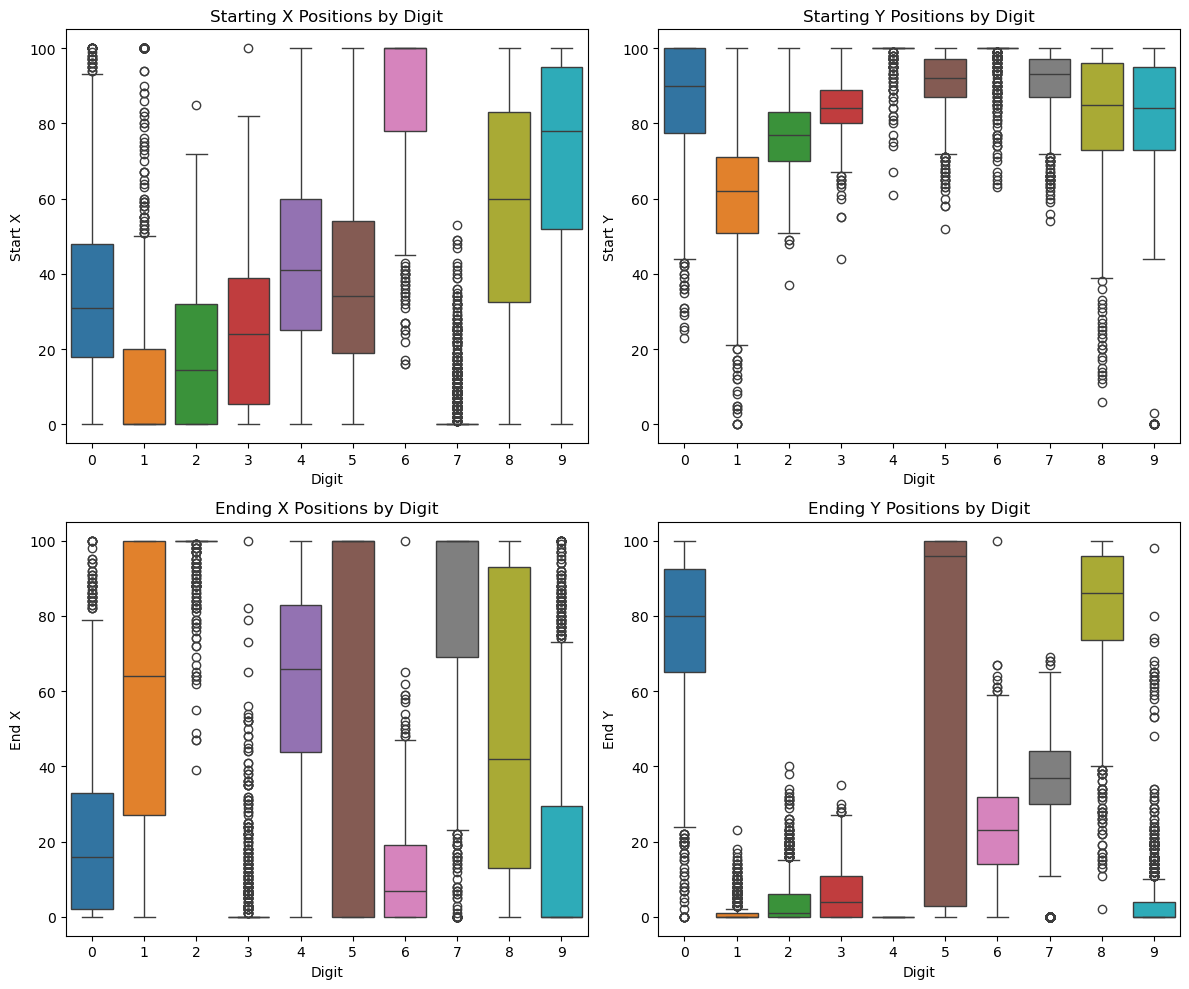

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "pendigits_txt.csv"
df = pd.read_csv(url)

# Display basic info
display(df.head())
display(df.info())
display(df.describe())

# Extract features and labels
X = df.iloc[:, :-1]  # First 16 columns are coordinate pairs
Y = df.iloc[:, -1]   # Last column is the digit label

# Extract starting and ending points
start_x, start_y = X.iloc[:, 0], X.iloc[:, 1]
end_x, end_y = X.iloc[:, -2], X.iloc[:, -1]

# Create a dataframe for analysis
start_end_df = pd.DataFrame({
    'Digit': Y,
    'Start_X': start_x,
    'Start_Y': start_y,
    'End_X': end_x,
    'End_Y': end_y
})

# Plot boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot for Starting X
sns.boxplot(data=start_end_df, x='Digit', y='Start_X', ax=axes[0, 0], palette='tab10')
axes[0, 0].set_title('Starting X Positions by Digit')
axes[0, 0].set_ylabel('Start X')

# Boxplot for Starting Y
sns.boxplot(data=start_end_df, x='Digit', y='Start_Y', ax=axes[0, 1], palette='tab10')
axes[0, 1].set_title('Starting Y Positions by Digit')
axes[0, 1].set_ylabel('Start Y')

# Boxplot for Ending X
sns.boxplot(data=start_end_df, x='Digit', y='End_X', ax=axes[1, 0], palette='tab10')
axes[1, 0].set_title('Ending X Positions by Digit')
axes[1, 0].set_ylabel('End X')

# Boxplot for Ending Y
sns.boxplot(data=start_end_df, x='Digit', y='End_Y', ax=axes[1, 1], palette='tab10')
axes[1, 1].set_title('Ending Y Positions by Digit')
axes[1, 1].set_ylabel('End Y')

plt.tight_layout()
plt.show()



# **Neural Network Architecture**

This is the basic architecture of the neural network for multi-class classification (e.g., recognizing digits 0–9).

---

## **1. Input Layer**
- **Purpose:** Accepts the input features ($x_1, x_2, \dots, x_n$).
- **Number of Nodes:** Equal to the number of features in the dataset ($n$).
- **Example:** For digit recognition, $n$ could represent pixel values from an image.

---

## **2. Fully Connected Layer**
- **Purpose:** Connects every input node to each output node with unique weights ($w_{ij}$).
- **Computation:** For each output node $j$, the weighted sum of inputs is calculated:
  $$
  y_j = \sum_{i=1}^n w_{ij} x_i + b_j
  $$
  Where:
  - $w_{ij}$: Weight connecting input $x_i$ to output $j$.
  - $b_j$: Bias term for output $j$.

---

## **3. Activation Function**
- **Purpose:** Applies the softmax function to the output of the summation layer to produce probabilities for each class.
- **Softmax Function:**
  $$
  z_j = \frac{e^{y_j}}{\sum_{k=1}^{C} e^{y_k}}
  $$
  Where:
  - $z_j$: Probability for class $j$.
  - $C$: Total number of classes (e.g., $C = 10$ for digits 0–9).
- **Output:** Probabilities for all classes, summing to 1.

---

## **4. Output Layer**
- **Purpose:** Represents the predicted class probabilities.
- **Number of Nodes:** Equal to the number of classes ($C$).
- **Example:**
  - For digit recognition, there are 10 nodes (one for each digit: 0–9).
  - The node with the highest probability corresponds to the predicted class.

---

## **Architecture Summary**
1. **Input Layer:**
   - Number of nodes: $n$ (features in the dataset).
2. **Fully Connected Layer:**
   - Each input node connects to every output node.
3. **Activation Function:**
   - Softmax applied to output for probability distribution.
4. **Output Layer:**
   - Number of nodes: $C$ (number of classes).

---

## **Workflow**
1. Input data ($x_1, x_2, \dots, x_n$) is fed into the input layer.
2. Weighted sums ($y_j$) are calculated in the fully connected layer.
3. Softmax activation converts these sums into probabilities ($z_j$).
4. The class with the highest probability is selected as the prediction.

---

This architecture ensures the network can classify the input into one of the $C$ classes (e.g., digits 0–9).


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.utils import to_categorical
import os
from tensorflow import keras
# import tensorflowjs as tfjs, no longer works
import json

# Load and prepare the data
def load_data(filepath):
    # Read the CSV file
    df = pd.read_csv(filepath)
    
    # Separate features and target
    X = df.iloc[:, :-1].values  # All columns except last <- Original Array - Last Column
    y = df.iloc[:, -1].values   # Last column is the class <- Last Column
    
    # Convert labels to one-hot encoding
    # Digit 0 → [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    # Each Class has its own Dimension, also ensures numerical value has no meaning
    # Easier to work with softmax 
    y = to_categorical(y)
    
    # Split the data, 20% with seed 42 for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale the features
    scaler = StandardScaler()
    # Calculate and scale for train
    X_train = scaler.fit_transform(X_train)
    # Use same calculated mean on training for testing data
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test, scaler

def create_model(input_shape, num_classes):
    model = Sequential([
        # Input layer
        InputLayer(input_shape=input_shape, name='input_layer'),

        # Hidden layers
        Dense(256, activation='relu'),
        Dropout(0.3),
        
        Dense(128, activation='relu'),
        Dropout(0.2),
        
        Dense(64, activation='relu'),
        Dropout(0.2),

        Dense(32, activation='relu'),
        Dropout(0.2),
        
        # Output layer
        Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

def train_model(model, X_train, y_train, X_test, y_test):
    # Define early stopping callback
    # Patience = 10, waits 10 epochcs
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping]
    )
    
    return history

def evaluate_model(model, X_test, y_test):
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"\nTest accuracy: {test_accuracy:.4f}")
    print(f"Test loss: {test_loss:.4f}")
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    return y_pred_classes, y_test_classes

def save_model_for_tfjs(model, save_path='./tfjs_model'):
    """
    Save the trained model in TensorFlow.js format
    """
    # Create directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)

    # Save weights
    weights_path = os.path.join(save_path, 'model.weights.h5')
    model.save_weights(weights_path)
    
    
    print(f"Model saved in TensorFlow.js format at: {save_path}")

    model.save('my_model.keras')

def save_scaler(scaler, filepath='scaler.json'):
    scaler_params = {
        'mean': scaler.mean_.tolist(),
        'scale': scaler.scale_.tolist()
    }
    with open(filepath, 'w') as f:
        json.dump(scaler_params, f)
    print(f"Scaler parameters saved to {filepath}")

def main():
    # Load and prepare data
    X_train, X_test, y_train, y_test, scaler = load_data('pendigits_txt.csv')
    
    # Create model with explicit input shape
    input_shape = (16,)  # Fixed input shape for 8 points (x,y)
    num_classes = 10     # 10 digits (0-9)
    
    print(f"Creating model with input shape: {input_shape}")
    model = create_model(input_shape=input_shape, num_classes=num_classes)
    
    # Print model summary to verify architecture
    model.summary()

    # Train model
    history = train_model(model, X_train, y_train, X_test, y_test)
    
    # Evaluate model
    y_pred_classes, y_test_classes = evaluate_model(model, X_test, y_test)

    # Save Model
    save_model_for_tfjs(model)

    # After fitting the scaler
    save_scaler(scaler)
    
    return model , history

if __name__ == "__main__":
    model, history = main()

Creating model with input shape: (16,)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,914 (187.16 KB)

 Trainable params: 47,914 (187.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4057 - loss: 1.7746 - val_accuracy: 0.9150 - val_loss: 0.2991
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8477 - loss: 0.5129 - val_accuracy: 0.9541 - val_loss: 0.1443
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9140 - loss: 0.3019 - val_accuracy: 0.9736 - val_loss: 0.0926
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9385 - loss: 0.2143 - val_accuracy: 0.9823 - val_loss: 0.0672
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9506 - loss: 0.1662 - val_accuracy: 0.9836 - val_loss: 0.0561
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9575 - loss: 0.1450 - val_accuracy: 0.9868 - val_loss: 0.0518
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9697 - loss: 0.1144 - val_accuracy: 0.9891 - val_loss: 0.0399
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9739 - loss: 0.0985 - val_accuracy: 0.9891 - v

In [38]:
! pip show tensorflow tensorflowjs

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: tensorflow_decision_forests, tensorflowjs, tf_keras
---
Name: tensorflowjs
Version: 4.22.0
Summary: 
Home-page: https://js.tensorflow.org/
Author: Google LLC
Author-email: opensource@google.com
License: Apache 2.0
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: flax, importlib_resources, jax, jaxlib, packaging, six, tensorflow, tensorflow-decision-forests, tensorflow-hub, tf-keras
Required-by: 
